In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
insurance = pd.read_csv(r"C:\users\shand\Downloads\insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Describing the Data

1. Columns 
This dataset was gathered from Kaggle, a website that provides datasets for data science and other related areas. 
There are 7 columns that each describe an aspect about a person using insurance. 

1. Age: How old the primary beneficary is 
2. Sex: What gender the primary beneficiary is
3. BMI: Body Mass Index, provides insights about weight versus height 
4. Children: The number of children the primary beneficary has 
5. Smoker: Stats whether the primary beneficary is a smoker or not 
6. Region: The region in the US in which the primary beneficary has their residental area listed 
7. Charges: The medical costs charged by health insurance 

2.  Quantitative Data
Quantitative Data is data that can be counted or measured. For example, a TV that is 60 inches has quantative data since 60 inches descibes the size of the TV. 

In the insurance dataset, there are a few columns with quantitative data: 
1. Age
2. BMI
3. Children
4. Charges

3. Qualtiative Data
Qualitative data is data that can descibe characterstics or aspects of an object or person. For example, a red TV has qualitative data since the color 'red' is used to explain how the TV looks. 

In the insurance dataset, there are a few columns with qualitiative data: 
1. Sex 
2. Smoker
3. Region 


# Plan with Dataset 

## Linear Regression Model 
 Linear regression models can provide helpful insights into how two different events relate to each other, or if they don't. They can also be useful to make predictions about what will happen. 
 
## Steps with Dataset 
### 1. Explore Dataset 
Exploring the data set is useful since it will allow me to understand the data more and how everything relates to one another. I will explore using various methods and graphing some relationships I think could be useful for the linear regression model. 
### 2. Determine Useful Variables
Once I explore the dataset and graph some data, I will want to find good variables for the model. For the linear regression model, it is important to have the correct data types [INSERT INFORMATION ABOUT WHICH ONES ARE GOOD DAT]

3. Divide Data

4. Build Model 
5. Clean Model 
6. Interpret Model 
7. Draw Conclusions 
8. Write Findings 


In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
insurance.shape

(1338, 10)

In [6]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# checking for null data points 
print(insurance.isnull().values.any())

False


In [8]:
insurance["log_charges"] = np.log2(insurance['charges'])

## Plotting Graphs to find Correlation
Here, I will plot some scatterplots, boxplots, and histograms with some variables to find any correlations to determine good variables. 

Since we are trying to predict insurance costs, I will use that as my independent variable and put it on my y-axis. I will find some other variables. 

### Scatter Plots

# Plotting Smoker versus Cost


array([[<Axes: title={'center': 'log_charges'}>]], dtype=object)

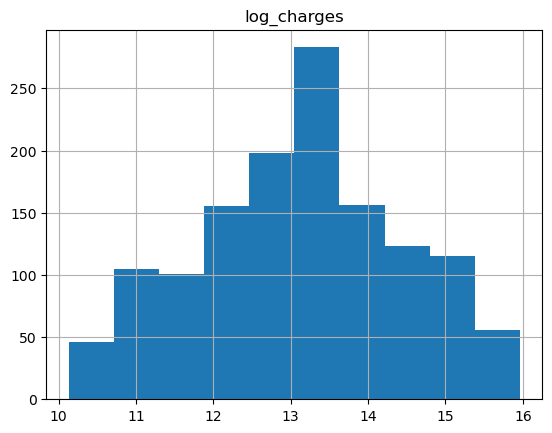

In [9]:
insurance.hist('log_charges')

explain the graph here

In [10]:
# Finding correlation 
insurance.corr()

C:\Users\shand\AppData\Local\Temp\ipykernel_13692\3145303447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance.corr()


,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


explain the findings here 

<Axes: title={'center': 'log_charges'}, xlabel='smoker'>

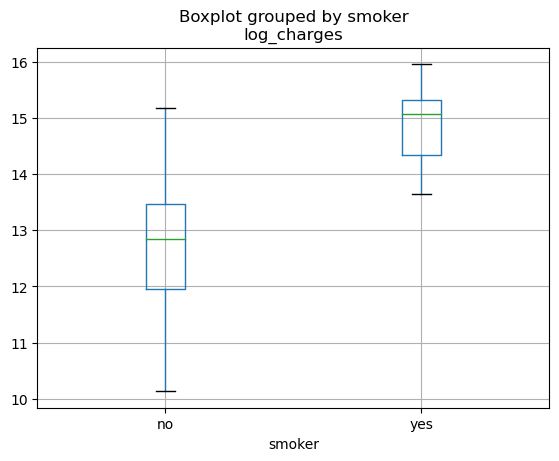

In [11]:
insurance.boxplot(column = ['log_charges'], by = 'smoker', showfliers = False)

<Axes: title={'center': 'log_charges'}, xlabel='sex'>

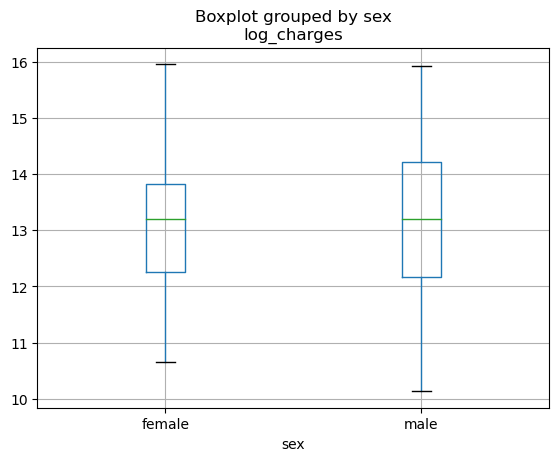

In [12]:
insurance.boxplot(column = ['log_charges'], by = 'sex', showfliers = False)

<Axes: title={'center': 'log_charges'}, xlabel='children'>

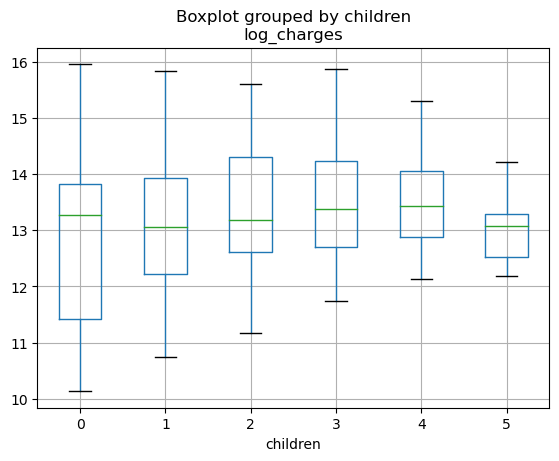

In [13]:
insurance.boxplot(column = ['log_charges'], by = 'children', showfliers = False)

<Axes: title={'center': 'log_charges'}, xlabel='region'>

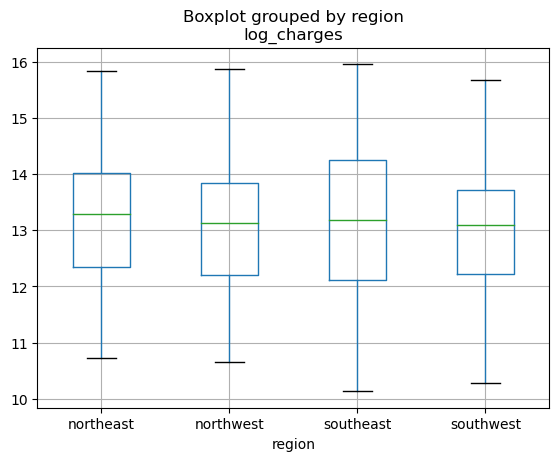

In [14]:
insurance.boxplot(column = ['log_charges'], by = 'region', showfliers = False)

<Axes: xlabel='age', ylabel='log_charges'>

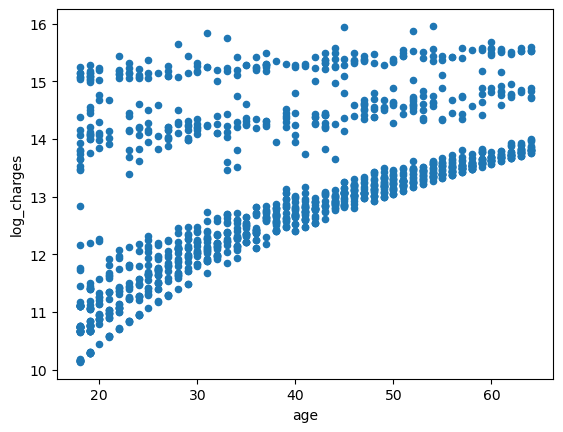

In [75]:
insurance.plot.scatter(x = 'age', y = 'log_charges')

Determine good variables 

In [15]:
insurance['smoker_boolean'] = insurance['smoker'].map({'yes': 1, 'no': 0})
insurance['sex_2'] = insurance['sex'].map({'female': 1, 'male':0})

In [52]:
# Dividing the dataset 
X = insurance[['smoker_boolean', 'age']]
y = insurance[['log_charges']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [53]:
print(X_train)

      smoker_boolean  age
332                0   61
355                0   46
138                0   54
381                1   55
292                1   25
...              ...  ...
1095               0   18
1130               0   39
1294               0   58
860                1   37
1126               0   55

[936 rows x 2 columns]


In [54]:
X_train.shape

(936, 2)

In [55]:
y_test.shape

(402, 1)

In [56]:
model = LinearRegression()

In [57]:
model.fit(X_train, y_train)

LinearRegression()

In [90]:
train_predictions = model.predict(X_train)

In [91]:
train_mse = mean_squared_error(y_train, train_predictions)
print(train_mse)

0.46922558932226793


In [92]:
r2_score(y_train, train_predictions)

0.7340752983738176

comments: 

1. gender 0.001
2. children 0.006
3. bmi 0.04
4. age 0.08
5. smoker 0.60

# Residuals 
### Interpreting the Residuals 


In [58]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

<Axes: xlabel='fitted', ylabel='residuals'>

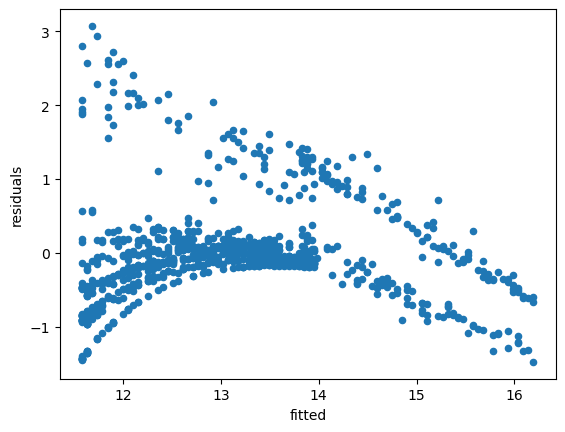

In [66]:
check = pd.DataFrame()
check["residuals"] = y_train - train_predictions
check["fitted"] = train_predictions

check.plot.scatter(x = "fitted", y = "residuals")

# Interpreting the Model

In [67]:
model.coef_

array([[2.24133225, 0.05148773]])

In [89]:
np.exp(2.24)

9.393331287442784

In [85]:
np.exp(0.05)

1.0512710963760241

Final Model Evaluation 

In [68]:
mse = mean_squared_error(y_test, test_predictions)
print(mse)

0.4321621090771448


In [64]:
r2_score(y_test, test_predictions)

0.7520498068838766